In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
%matplotlib inline

import IPython.display

In [2]:
file_path = "../data/songData/genres/blues/blues.00000.wav"
y, sr = librosa.load(file_path)

In [3]:
S_full, phase = librosa.magphase(librosa.stft(y))

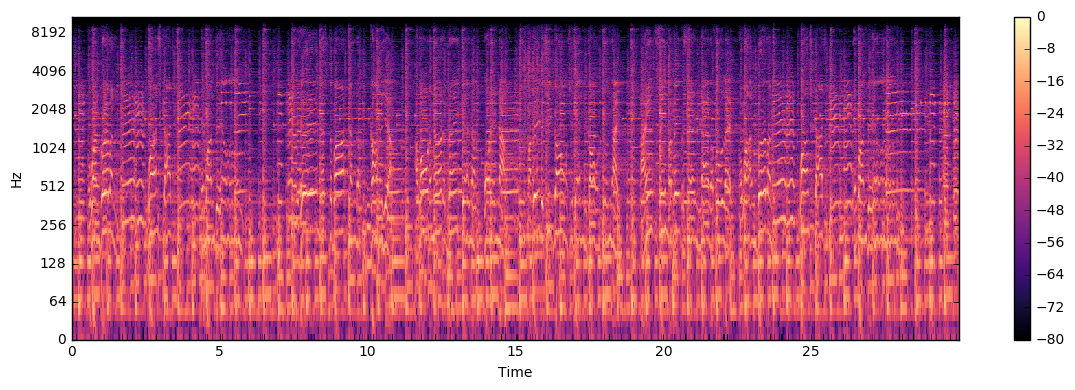

In [4]:
idx = slice(*librosa.time_to_frames([0, 30], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                        x_axis='time', y_axis='log', sr=sr)
plt.colorbar()
plt.tight_layout()

In [5]:
S_filter = librosa.decompose.nn_filter(S_full,
                                      aggregate=np.median,
                                      metric='cosine',
                                      width=int(librosa.time_to_frames(2, sr)))

In [6]:
S_filter = np.minimum(S_filter, S_full)

In [7]:
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                              margin_i * (S_full - S_filter),
                              power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                              margin_v * S_filter,
                              power=power)

S_foreground = mask_v * S_full
S_background = mask_i * S_full

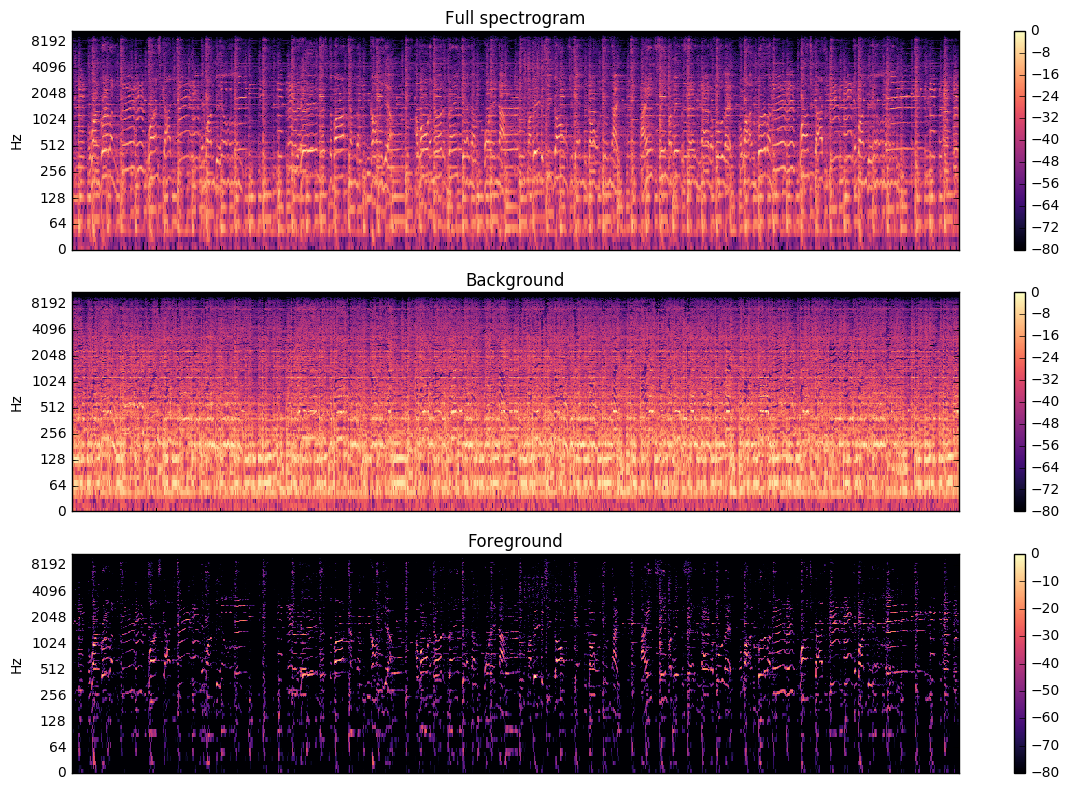

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                        y_axis='log', sr=sr)
plt.title('Full spectrogram')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                        y_axis='log', sr=sr)
plt.title('Foreground')
plt.colorbar()

plt.tight_layout()

In [9]:
background_data = librosa.decompose.decompose(S_background)

IPython.display.Audio(data=background_data, rate=sr)

KeyboardInterrupt: 